In [15]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
df2 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

#### The first dataset contains the following features:-

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.

#### The second dataset has the following features:-

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy ,Thriller etc.

homepage - A link to the homepage of the movie.

id - This is infact the movie_id as in the first dataset.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation or adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved.

#### Let's join the two dataset on the 'id' column

In [16]:
df1.columns = ["id" , "tittle" , "cast" , "crew"]
df2 = df2.merge(df1 , on = 'id')

### Demographic Filtering 
Before getting started with this -

-we need a metric to score or rate a movie 

-Calculate the score for every movie

-Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-
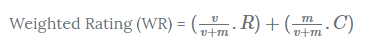
where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And

C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [17]:
C = df2['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [18]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [19]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [20]:
def weighted_ratings(x , m = m , C = C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation Based on the IMDB Formula
    return (v/(v+m)*R) + (m/(m+v)*C)

# Define a new feature 'score' and calculate its value with 'weighted_rating()'
q_movies['score'] = q_movies.apply(weighted_ratings , axis = 1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [21]:
# Sort movies based on score calculated
q_movies = q_movies.sort_values('score',ascending = False)

# Print top 10 movies
q_movies[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884
